In [ ]:
from google.colab import files
newFile= files.upload()

Saving Bankruptcy Prediction Data.csv to Bankruptcy Prediction Data.csv


In [ ]:
import pandas as pd
df = pd.read_csv("Bankruptcy Prediction Data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)




Missing Values:
Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


In [ ]:
target = 'Bankrupt?'
X = df.drop(columns=[target])  # Features
y = df[target]  # Target

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Standardize the data for feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use SelectKBest to identify top features
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_new = selector.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("\nSelected Features:")
print(selected_features)

# Update X to include only selected features
X = X[selected_features]



Selected Features:
Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Net profit before tax/Paid-in capital',
       ' Retained Earnings to Total Assets', ' Net Income to Total Assets'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
logistic_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Train and evaluate models
models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model
}

print("\nModel Performance:")
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    # Print results
    print(f"\n{name}:")
    print(f"  Accuracy: {accuracy:.2f}")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  AUC-ROC: {auc_roc}")



Model Performance:

Logistic Regression:
  Accuracy: 0.96
  Precision: 0.71
  Recall: 0.06
  F1 Score: 0.12
  AUC-ROC: 0.9335587346258079

Decision Tree:
  Accuracy: 0.95
  Precision: 0.33
  Recall: 0.24
  F1 Score: 0.28
  AUC-ROC: 0.6121404002501564

Random Forest:
  Accuracy: 0.97
  Precision: 0.71
  Recall: 0.19
  F1 Score: 0.30
  AUC-ROC: 0.8982697519282885


<ipython-input-13-8d3fff019ec0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_ranking, palette="Blues_r")


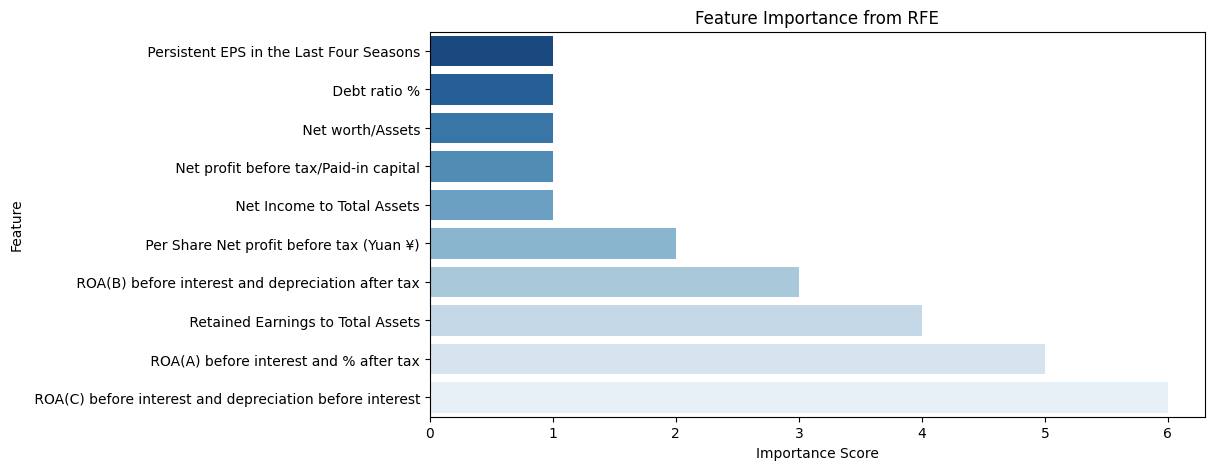

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
# Train a Random Forest model for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(rf, n_features_to_select=5)
selector.fit(X_train, y_train)

# Get feature rankings
feature_ranking = pd.DataFrame({'Feature': X_train.columns, 'Importance': selector.ranking_})
feature_ranking = feature_ranking.sort_values(by='Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_ranking, palette="Blues_r")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance from RFE")
plt.show()

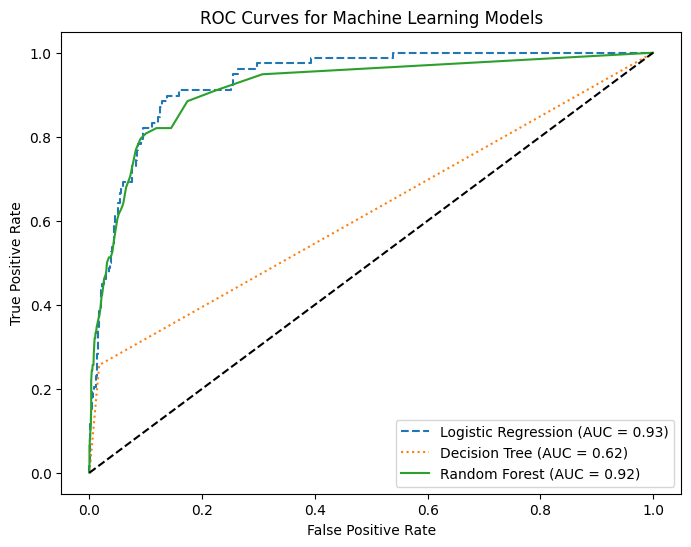

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train models
log_reg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)

log_reg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Get predicted probabilities
y_probs_log = log_reg.predict_proba(X_test)[:, 1]
y_probs_dt = dt.predict_proba(X_test)[:, 1]
y_probs_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_log, tpr_log, _ = roc_curve(y_test, y_probs_log)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)

auc_log = auc(fpr_log, tpr_log)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', linestyle="--")
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', linestyle=":")
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linestyle="-")
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Machine Learning Models")
plt.legend()
plt.show()


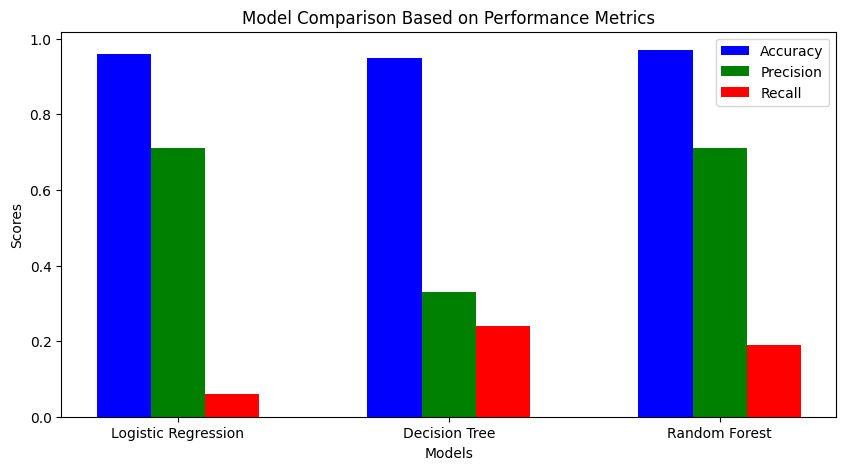

In [ ]:
import numpy as np

# Model performance values (from previous results)
models = ["Logistic Regression", "Decision Tree", "Random Forest"]
accuracy = [0.96, 0.95, 0.97]
precision = [0.71, 0.33, 0.71]
recall = [0.06, 0.24, 0.19]

# Define width of bars
bar_width = 0.2
index = np.arange(len(models))

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(index, accuracy, bar_width, label="Accuracy", color="blue")
plt.bar(index + bar_width, precision, bar_width, label="Precision", color="green")
plt.bar(index + 2 * bar_width, recall, bar_width, label="Recall", color="red")

plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Model Comparison Based on Performance Metrics")
plt.xticks(index + bar_width, models)
plt.legend()
plt.show()
